[2017-02-18 00:01:22,690] Making new env: FrozenLake-v3


Success Rate: 0.96
Final Q-Table Values
[[ 0.          0.95099005  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.96059601  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.970299    0.        ]
 [ 0.          0.          0.9801      0.        ]
 [ 0.          0.99        0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.        ]]


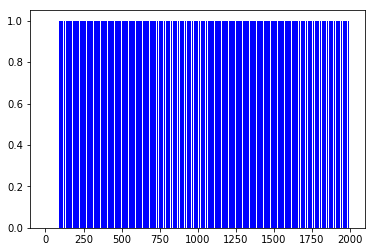

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

register(
    id = 'FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
           'is_slippery':False}
)

env =gym.make('FrozenLake-v3')

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Discount factor
dis = .99
num_episodes = 2000

# Create lists to contain total rewards and steps per episode
rList = []


for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    
    #e = 1./((i / 100) + 1)
    
    # The Q-Table learning algorithm
    while not done:
        # Choose an action by e-greedy with noise picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        
        # Get new state and reward from environment
        new_state, reward, done,_ = env.step(action)

        # Update Q-Table with new knowledge using decay rate
        Q[state, action] = reward + dis * np.max(Q[new_state,:])
        
        rAll += reward
        state = new_state
    
    rList.append(rAll)
    
print("Success Rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()